In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
scalar = tf.constant(5)
print("Скаляр:", scalar)

vector = tf.constant([1, 2, 3, 4])
print("Вектор:", vector)

matrix = tf.constant([[1, 2], [3, 4]])
print("Матриця:\n", matrix)


Скаляр: tf.Tensor(5, shape=(), dtype=int32)
Вектор: tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
Матриця:
 tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [3]:
print("Скаляр:", scalar.numpy())

print("Значення скаляра:", scalar.numpy())

scalar_var = tf.Variable(scalar)
scalar_var.assign(10)
print("Після update:", scalar_var.numpy())

scalar_var.assign(0)
print("Після delete/перезапису:", scalar_var.numpy())


Скаляр: 5
Значення скаляра: 5
Після update: 10
Після delete/перезапису: 0


In [4]:
print("\nВектор:", vector.numpy())

print("Елемент на позиції 2:", vector[2].numpy())

v = tf.Variable(vector)
v[2].assign(99)
print("Після update:", v.numpy())

v_new = v[:3]
print("Після delete (перші 3 елементи):", v_new.numpy())



Вектор: [1 2 3 4]
Елемент на позиції 2: 3
Після update: [ 1  2 99  4]
Після delete (перші 3 елементи): [ 1  2 99]


In [5]:
print("\nМатриця:\n", matrix.numpy())

print("Елемент [1,1]:", matrix[1,1].numpy())

m = tf.Variable(matrix)
m[0,1].assign(77)
print("Після update:\n", m.numpy())

m_new = m[:1,:]
print("Після delete (залишили перший рядок):\n", m_new.numpy())



Матриця:
 [[1 2]
 [3 4]]
Елемент [1,1]: 4
Після update:
 [[ 1 77]
 [ 3  4]]
Після delete (залишили перший рядок):
 [[ 1 77]]


In [6]:
x_reg = tf.linspace(0.0, 10.0, 100)
y_reg = 2 * x_reg + tf.random.normal(shape=[100], mean=0.0, stddev=1.0)

x_reg = tf.reshape(x_reg, (-1,1))
y_reg = tf.reshape(y_reg, (-1,1))


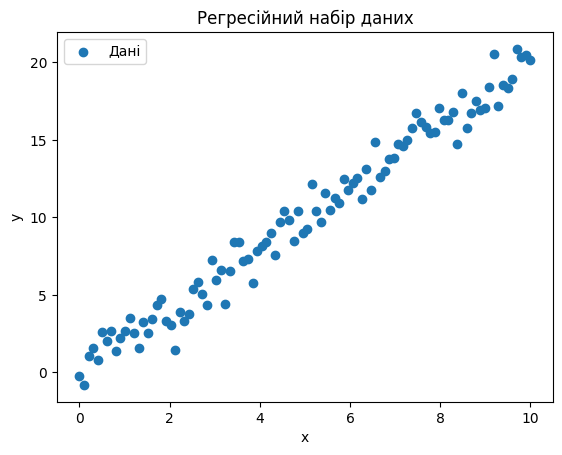

In [7]:
plt.scatter(x_reg.numpy(), y_reg.numpy(), label="Дані")
plt.title("Регресійний набір даних")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


In [8]:
class0 = tf.random.normal(shape=[50, 2], mean=0.0, stddev=1.0)
class1 = tf.random.normal(shape=[50, 2], mean=3.0, stddev=1.0)

X_class = tf.concat([class0, class1], axis=0)
y_class = tf.concat([tf.zeros(50), tf.ones(50)], axis=0)

X_class = tf.cast(X_class, tf.float32)
y_class = tf.cast(y_class, tf.float32)


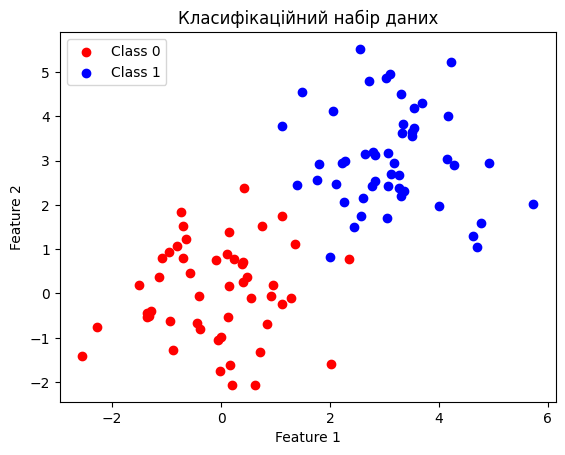

In [9]:
plt.scatter(X_class[:50,0], X_class[:50,1], color='red', label='Class 0')
plt.scatter(X_class[50:,0], X_class[50:,1], color='blue', label='Class 1')
plt.title("Класифікаційний набір даних")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
